In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read the csv
df = pd.read_csv("Task 3 and 4_Loan_Data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


## Rating Map

In [4]:
rating_map = {range(800,851):1,range(750,800):2,range(700,750):3,
     range(650,700):4,range(600,650):5,range(550,600):6 , range(300,550):7}

In [5]:
rating_map

{range(800, 851): 1,
 range(750, 800): 2,
 range(700, 750): 3,
 range(650, 700): 4,
 range(600, 650): 5,
 range(550, 600): 6,
 range(300, 550): 7}

In [6]:
df['Rating'] = df['fico_score'].apply(lambda x: next((i for j, i in rating_map.items() if x in j), 0))

<AxesSubplot:xlabel='Rating', ylabel='count'>

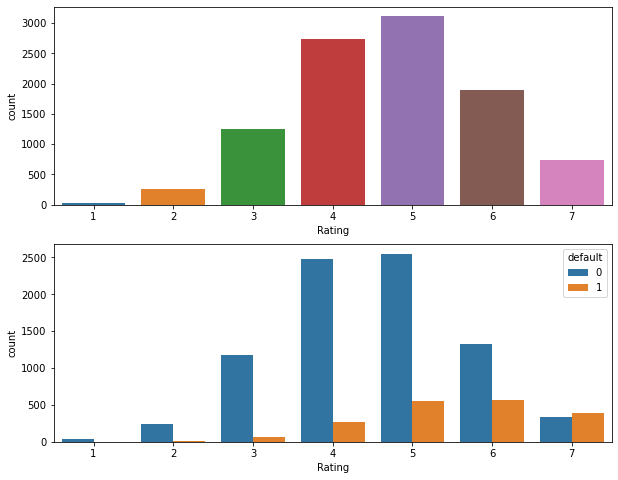

In [21]:
#Rating Analysis
rating_data = pd.DataFrame(df['Rating'].value_counts()) 
rating_data_new = rating_data.reset_index()
rating_data_new.columns = ['Rating', 'count']
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
sns.barplot(x="Rating", y="count", data=rating_data_new, ax = axs[0])
sns.countplot(x=df["Rating"], hue = df["default"], ax = axs[1])

## Model Building

##### All the variables

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [9]:
X = df.drop(['default','fico_score'], axis=1)
y = df['default']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [12]:
#Accuracy Score
print(f"Accuracy of the Decision Tree Model = {dt_model.score(X_test, y_test).round(4)}")

Accuracy of the Decision Tree Model = 0.9913


In [13]:
#Confusion Matrix
print("Confusion Matrix for Decision Tree Model: ")
print(confusion_matrix(y_test, y_pred_dt))

Confusion Matrix for Decision Tree Model: 
[[2441   13]
 [  13  533]]


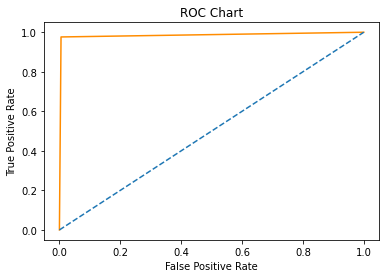

In [14]:
#ROC Curve -
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
plt.plot(fpr, tpr, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Chart")
plt.show()

##### Only Rating Variable

In [15]:
X = df['Rating'].to_numpy().reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [16]:
#Accuracy Score
print(f"Accuracy of the Decision Tree Model = {dt_model.score(X_test, y_test).round(4)}")

Accuracy of the Decision Tree Model = 0.8227


In [17]:
#Confusion Matrix
print("Confusion Matrix for Decision Tree Model: ")
print(confusion_matrix(y_test, y_pred_dt))

Confusion Matrix for Decision Tree Model: 
[[2344  110]
 [ 422  124]]


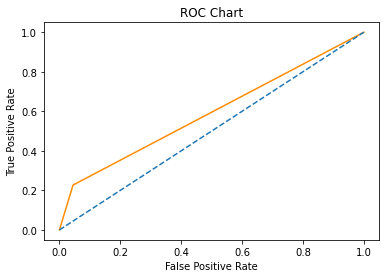

In [18]:
#ROC Curve -
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
plt.plot(fpr, tpr, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Chart")
plt.show()

#### Rating is a very important regressor. The Rating variable singularly predicts with accuracy of around 80%.

In [19]:
y_prob = dt_model.predict_proba(X)
prob_data = pd.DataFrame(y_prob[:,1][0:].round(decimals = 2), columns = ['Probability'])
X_new = pd.concat([df, prob_data], axis = 1)

In [20]:
X_new

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,Rating,Probability
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,5,0.18
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,6,0.30
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,5,0.18
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,5,0.18
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,5,0.18
...,...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0,4,0.10
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0,5,0.18
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0,6,0.30
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0,5,0.18


#### The above model underestimates the defaulter risk due large non-defaulter data. But it can be used to predict the probability of the rating or predicting the rating of the customer. 
#### Proper sampling of data may solve the underestimation problem.